In [1]:
import pandas as pd
df=pd.read_csv("iris.csv")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
y=df.species
x=df.drop(columns=['species'])

In [4]:
df.shape

(150, 5)

In [5]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression()

In [8]:
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lr.score(x,y)

0.9733333333333334

In [10]:
lr.predict([[5.1,3.5,1.4,0.2]])

array(['setosa'], dtype=object)

In [11]:
lr.predict_proba([[5.1,3.5,1.4,0.2]])

array([[9.81802952e-01, 1.81970335e-02, 1.43470785e-08]])

In [12]:
[round(float(x),2) for x in lr.predict_proba([[5.1,3.5,1.4,0.2]])[0]]

[0.98, 0.02, 0.0]

In [13]:
lr.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
lr.coef_

array([[-0.42332359,  0.96165008, -2.5193638 , -1.08617659],
       [ 0.53399144, -0.31779047, -0.20533556, -0.93955173],
       [-0.11066785, -0.64385961,  2.72469936,  2.02572832]])

In [15]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

In [16]:
actual_output    = y
predicted_output = lr.predict(x)

In [17]:
cm(actual_output,predicted_output)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [18]:
print(cr(actual_output,predicted_output))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [19]:
#  precision - how many setosas you called as setosa are actually setosa

In [20]:
# recall - how many setosas in the original dataset you could classify as setosa

In [21]:
import seaborn as sns

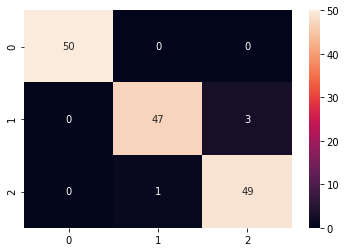

In [22]:
sns.heatmap(cm(actual_output,predicted_output),annot=True)

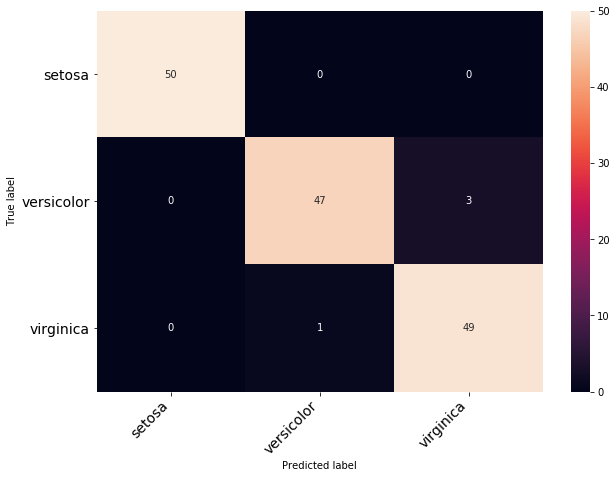

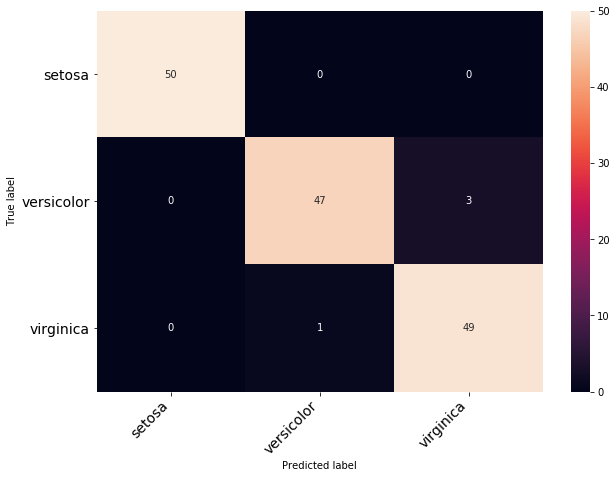

In [26]:
from srtools import print_confusion_matrix

mymatrix = cm(y,lr.predict(x))
print_confusion_matrix(mymatrix, lr.classes_, figsize = (10,7), fontsize=14)